# Preliminaries & Setup

In [ ]:
!pip install matplotlib torchvision

# Dataset Introduction (PyTorch MNIST)

## Dataset:
Series of handwritten digits that have been classified as being 0-9

## Structure:
Stored as a CSV file, with one image per line & starting with the image's class
`label,pixel0,pixel1,pixel2,...`

**label**: [0-9] - *Represents what class the image is*  
**pixeln**: [0-255] - *Represents the brightness of a pixel, with 0 being black and 1 being white*

# 1: Import Packages
## General utility packages

In [ ]:
import numpy as np # General math & fast arrays
import pandas as pd # Image loading & analysis
import matplotlib.pyplot as plt # Graphing training metrics & rendering images
from sklearn.model_selection import train_test_split # Splitting dataset into parts

100%|██████████| 7/7 [00:00<00:00, 31003.30it/s]


## Tensorflow
Tensorflow is one of two standard libraries for building machine learning models. (longer description)

In [ ]:
from tensorflow.keras.models import Sequential # Model type: Sequential
from tensorflow.keras.layers import Dense, Flatten, Input # Types of layers we're going to use
from tensorflow.keras.utils import to_categorical # Utility function for later

In [ ]:
train_data = pd.read_csv('data/train.csv')
print("Shape of train_data:", train_data.shape)


X = train_data.iloc[:, 1:]  
y = train_data.iloc[:, 0]   

print("Shape of X after separating features:", X.shape)

Shape of train_data: (42000, 785)
Shape of X after separating features: (42000, 784)


In [4]:
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)  
X = X.values / 255.0
X = X.reshape(-1, 28, 28, 1)
print("Shape of X after reshaping:", X.shape)

Shape of X after reshaping: (42000, 28, 28, 1)


In [5]:
y = to_categorical(y, num_classes=10)
print("Shape of y after one-hot encoding:", y.shape)

Shape of y after one-hot encoding: (42000, 10)


In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)

X_train shape: (33600, 28, 28, 1)


In [9]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9126 - loss: 0.3080 - val_accuracy: 0.9489 - val_loss: 0.1733
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9612 - loss: 0.1264 - val_accuracy: 0.9650 - val_loss: 0.1167
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9734 - loss: 0.0857 - val_accuracy: 0.9663 - val_loss: 0.1035
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9784 - loss: 0.0639 - val_accuracy: 0.9680 - val_loss: 0.1050
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9842 - loss: 0.0491 - val_accuracy: 0.9675 - val_loss: 0.1121
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9879 - loss: 0.0387 - val_accuracy: 0.9702 - val_loss: 0.1075
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9902 - loss: 0.0300 - val_accuracy: 0.9689 - val_loss: 0.1187
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9926 - loss: 0.0241 - 

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9715 - loss: 0.1161
Validation Accuracy: 97.15%


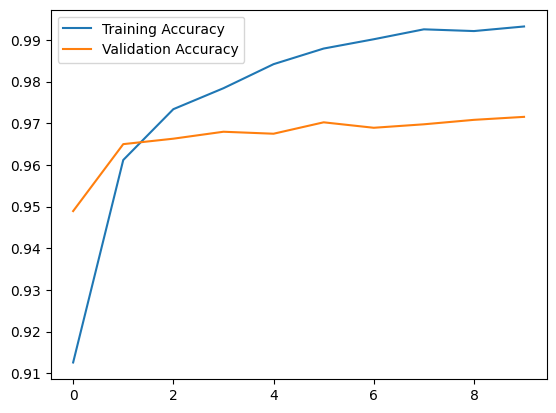

In [11]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


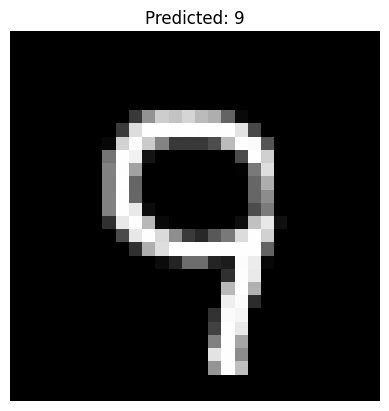

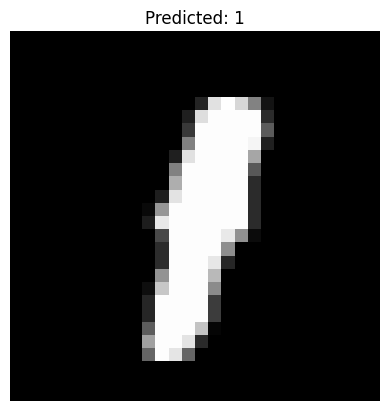

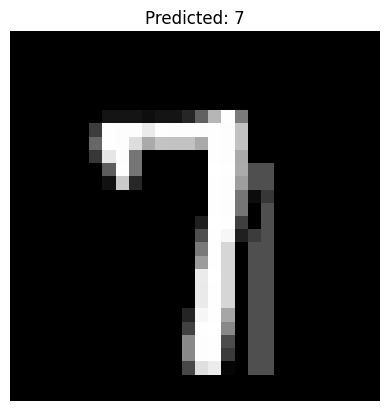

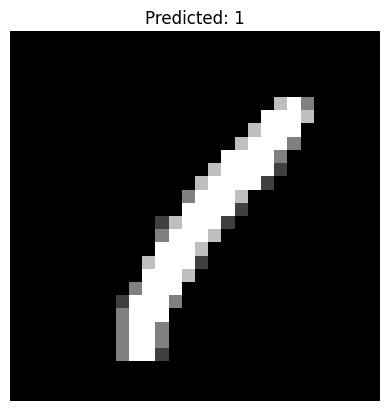

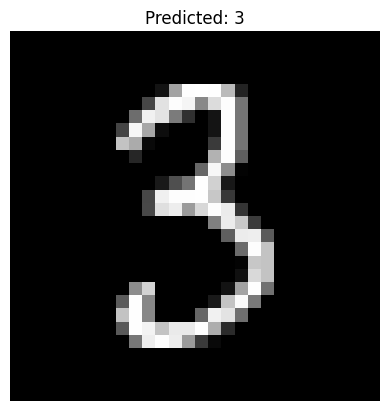

In [14]:
test_data = pd.read_csv('data/test.csv')
X_test = test_data.values / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()